# Galaxical Potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget
np.set_printoptions(precision=5)
plt.style.use("ggplot")

In [2]:
from smbbh_nu import SMBBH_NU
from plot_process import Plot_Result

## $c = \frac{2}{\pi}M_{g}$

$M_{g} = $ Mg_rate$\cdot\frac{(m_{1} + m_{2})}{2}$

In [3]:
# constant c :

def c(Mg_rate):
    m1, m2 = 1, 1
    G = 1
    Mg = Mg_rate * ((m1 + m2)/2)
    return (2/np.pi)*Mg

## $V(r) = -c\frac{\arctan(r)}{r}$

In [4]:
# galaxical potential:

def V(r, c):
    return -c * (np.arctan(r)/r)


## $V(r)$ Plot

In [5]:
r_range = np.linspace(0, 2, 1001)
r = r_range[1::]

In [6]:
Mg_rate = np.linspace(200, 1000, 5)
Mg_rate

array([ 200.,  400.,  600.,  800., 1000.])

In [7]:
c_list = [c(c_value) for c_value in Mg_rate]
V_list = [V(r, c_value) for c_value in c_list]

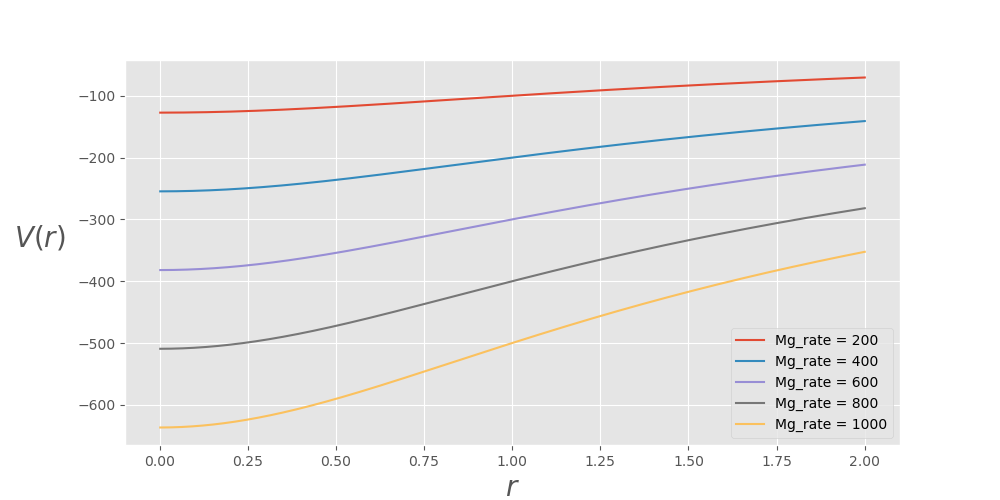

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot()
for i, v in enumerate(V_list):
    plt.plot(r, V_list[i], label=f"Mg_rate = {(i+1)*200}")
plt.xlabel(r"$r$", fontsize=20)
plt.ylabel(r"$V(r)$        ", fontsize=20, rotation=0)
plt.legend()
plt.show()

## Model A1 Test

In [9]:
radius_unit = 2
mass_sum = 1

In [10]:
# Mg_rate:
Mg_rate = float(input("Mg_rate: "))

Mg_rate:  600


In [11]:
# c:
c = (2/np.pi)*(Mg_rate*mass_sum*0.5)

In [12]:
Ui = (0.5**3) + c*(np.arctan(radius_unit*0.5)/(radius_unit*0.5)) 

# E total c:
egy_total_c = 2*Ui

# A:
A = 2  # 12

# E total:
egy_total = -egy_total_c/A
print(np.round(egy_total, 4))

-150.125


In [13]:
# E1, E2:
egy_1 = egy_total*0.5
egy_2 = egy_total*0.5

E_contro_p1 = egy_1
E_contro_p2 = egy_2

In [14]:
# p1_v0 = vo1_0 + E_contro_p1 
# p2_v0 = vo2_0 + E_contro_p2
p1_v0 = np.array([0.0, np.sqrt(-E_contro_p1), 0.0]) 
p2_v0 = np.array([0.0, - np.sqrt(-E_contro_p2), 0.0]) 

mass1 = 0.2
mass2 = 0.8

r_range = np.linspace(1, 25, 25)

radius1 = list(mass2*r_range )
radius2 = list(mass1*r_range )

E1_list = []
for r in radius1:
    E1 = 0.5*(p1_v0[1]**2) - (mass1**3 / r) + V(r, c)
    E1_list.append(E1)
    
E2_list = []
for r in radius2:
    E2 = 0.5*(p2_v0[1]**2) - (mass2**3 / r) + V(r, c)
    E2_list.append(E2)

V1 = [V(r, c) for r in radius1]
V2 = [V(r, c) for r in radius2]

E_total_list = []
for E1, E2 in zip(E1_list, E2_list):
    Et = E1 + E2
    E_total_list.append(Et)

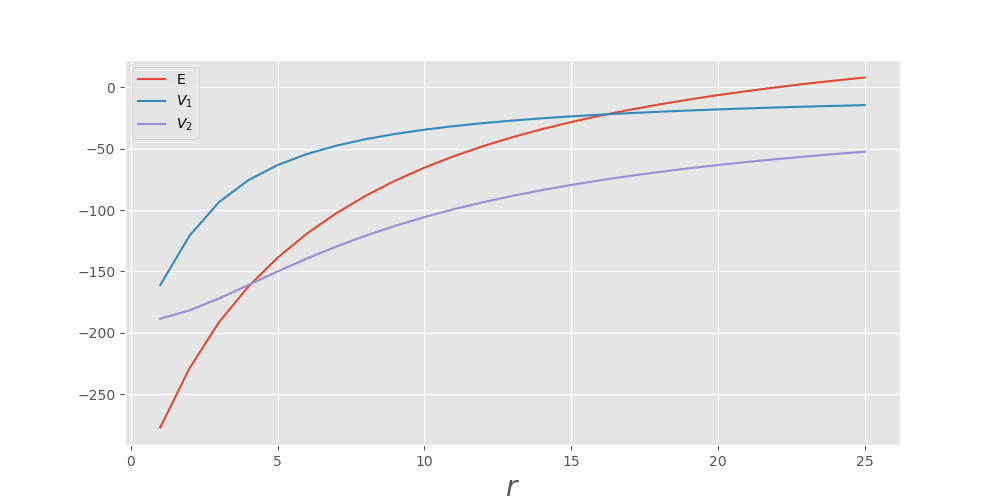

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot()
plt.plot(r_range, E_total_list, label=r"E")
plt.plot(r_range, V1, label=r"$V_{1}$")
plt.plot(r_range, V2, label=r"$V_{2}$")
plt.xlabel(r"$r$", fontsize=20)
# plt.ylabel(r"$V(r)$        ", fontsize=20, rotation=0)
plt.legend()
plt.show()